In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


__Exploring Dataset__

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


__Visualizing Data__

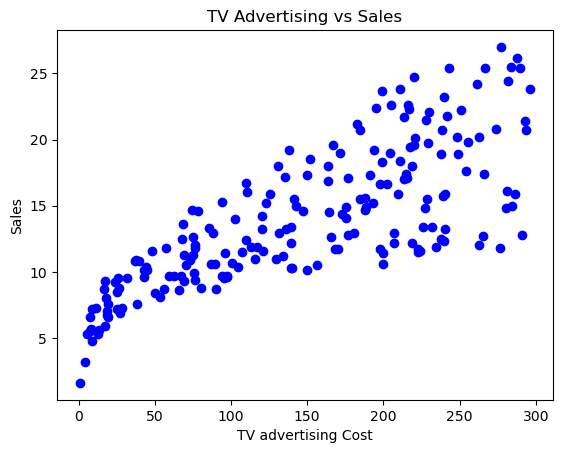

In [8]:
plt.scatter(data['TV'], data['Sales'], color = 'blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV advertising Cost')
plt.ylabel('Sales')
plt.show()

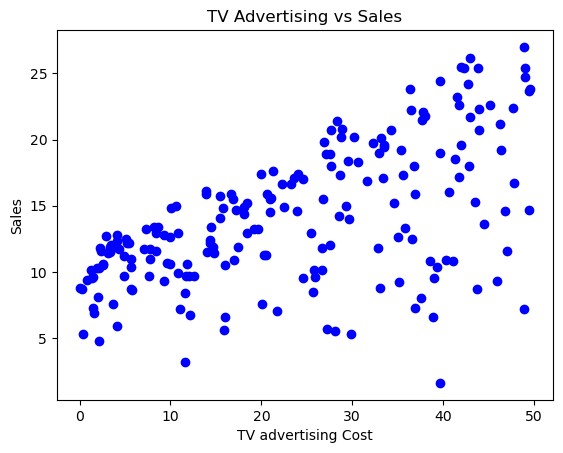

In [9]:
plt.scatter(data['Radio'], data['Sales'], color = 'blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV advertising Cost')
plt.ylabel('Sales')
plt.show()

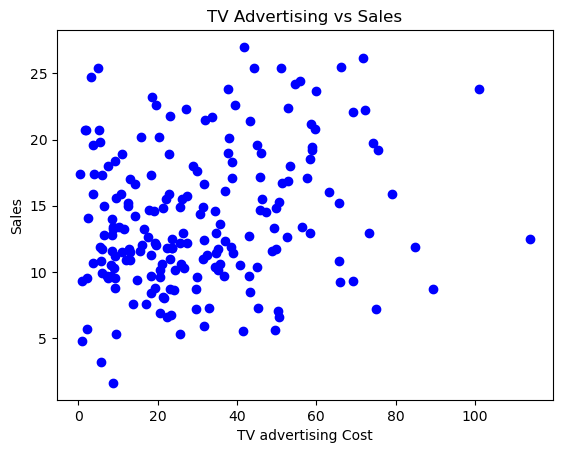

In [10]:
plt.scatter(data['Newspaper'], data['Sales'], color = 'blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV advertising Cost')
plt.ylabel('Sales')
plt.show()

__Building Model for Linear Regression__

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define independent variable (X) and target variable (y)
X = data[['TV']]  # Feature (TV advertising cost)
y = data['Sales']  # Target (Sales)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Sales on the test set
y_pred = model.predict(X_test)


__Evaluating Model__

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 10.186181934530214
R-squared: 0.6763151577939723


__Visualizing The Results__

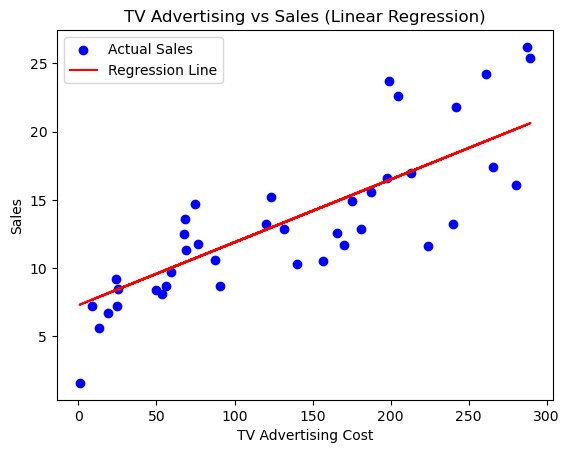

In [14]:
# Plot the actual vs predicted sales
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('TV Advertising vs Sales (Linear Regression)')
plt.xlabel('TV Advertising Cost')
plt.ylabel('Sales')
plt.legend()
plt.show()


__Results Intrepretation__

Inspecting the Coefficients

In [15]:
# Get the coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

print(f'Coefficient (TV): {coefficient}')
print(f'Intercept: {intercept}')


Coefficient (TV): 0.046007789603017206
Intercept: 7.292493773559357


Evaluating Model Performance

In [16]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 10.186181934530214
R-squared: 0.6763151577939723


Visualizing Regression Line

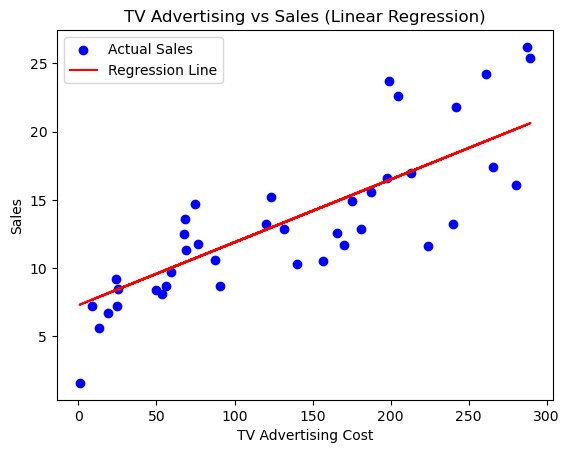

In [18]:
# Plot the actual vs predicted sales
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('TV Advertising vs Sales (Linear Regression)')
plt.xlabel('TV Advertising Cost')
plt.ylabel('Sales')
plt.legend()
plt.show()


Analyzing Residual

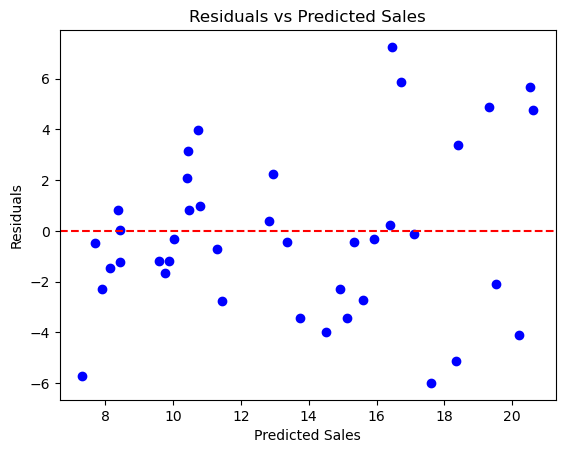

In [21]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


__Multiple Linear Regression Model__

Preparing Data

In [22]:
# Define independent variables (X) and dependent variable (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Fit Multiple Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales for the test set
y_pred = model.predict(X_test)


Evaluating Model

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4.402118291449682
R-squared: 0.8601145185017869


Analyzing Coefficients

In [25]:
# Get the coefficients and intercept
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
intercept = model.intercept_

print(f'Intercept: {intercept}')
print(coefficients)


Intercept: 2.9948930304953265
           Coefficient
TV            0.044584
Radio         0.196497
Newspaper    -0.002781


Visualizing Residual

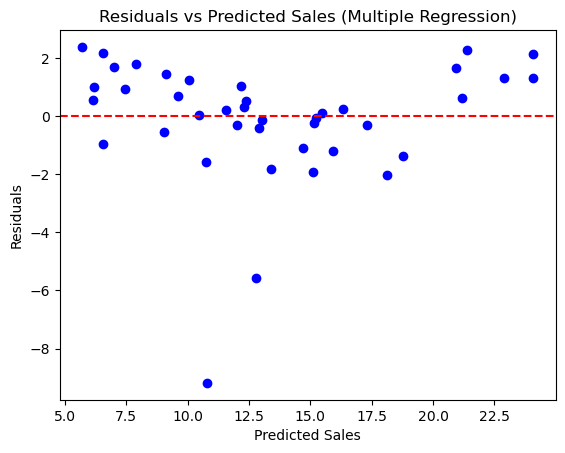

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Sales (Multiple Regression)')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.show()


Visualizing Actual vs predicted sales

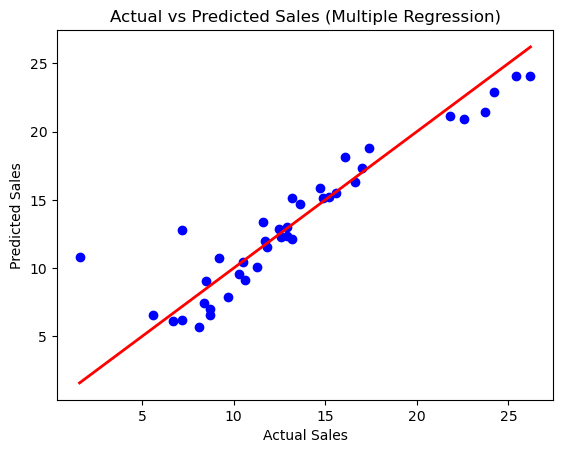

In [27]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Sales (Multiple Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()
